In [13]:
import struct
import numpy as np
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

train_images_filename = "train-images-idx3-ubyte"
train_labels_filename = "train-labels-idx1-ubyte"
test_images_filename = "t10k-images-idx3-ubyte"
test_labels_filename = "t10k-labels-idx1-ubyte"
train_images = read_idx(train_images_filename)
train_labels = read_idx(train_labels_filename)
test_images = read_idx(test_images_filename)
test_labels = read_idx(test_labels_filename)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


In [14]:
from keras.utils import np_utils
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
train_images = np.expand_dims(train_images, axis = -1)
test_images = np.expand_dims(test_images, axis = -1)
train_labels = np_utils.to_categorical(train_labels)
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))
((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000,))


5


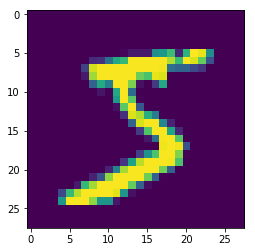

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_images[0,:,:,0])
print(train_labels[0].argmax())

In [5]:
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils


mySimpleModel = Sequential()
mySimpleModel.add(Conv2D(32, kernel_size = (3,3), activation='relu', padding = 'same', input_shape=(28,28,1)))
mySimpleModel.add(MaxPooling2D(pool_size=(2,2)))
mySimpleModel.add(BatchNormalization())
mySimpleModel.add(Conv2D(64, kernel_size = (3,3), activation='relu', padding = 'same'))
mySimpleModel.add(MaxPooling2D(pool_size=(2,2)))
mySimpleModel.add(BatchNormalization())
mySimpleModel.add(Conv2D(128, kernel_size = (3,3), activation='relu', padding = 'same'))
mySimpleModel.add(Flatten())
mySimpleModel.add(BatchNormalization())
mySimpleModel.add(Dense(64))
mySimpleModel.add(Dense(10, activation = 'softmax'))

mySimpleModel.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

mySimpleModel.fit(train_images, train_labels, epochs = 1, verbose = 1)

Epoch 1/1
60000/60000 [==============================] - 146s 2ms/step - loss: 0.3919 - acc: 0.9544


In [23]:
test_pred = mySimpleModel.predict(test_images)
test_pred_cat = np.argmax(test_pred, axis = 1)
mismatch_labels = test_pred_cat[test_pred_cat != test_labels]
mismatch_images = test_images[test_pred_cat != test_labels]
mismatch_test = test_labels[test_pred_cat != test_labels]
mismatch = zip(mismatch_labels, mismatch_images, mismatch_test)
print(len(mismatch_test)*1.0/len(test_labels))

0.0249


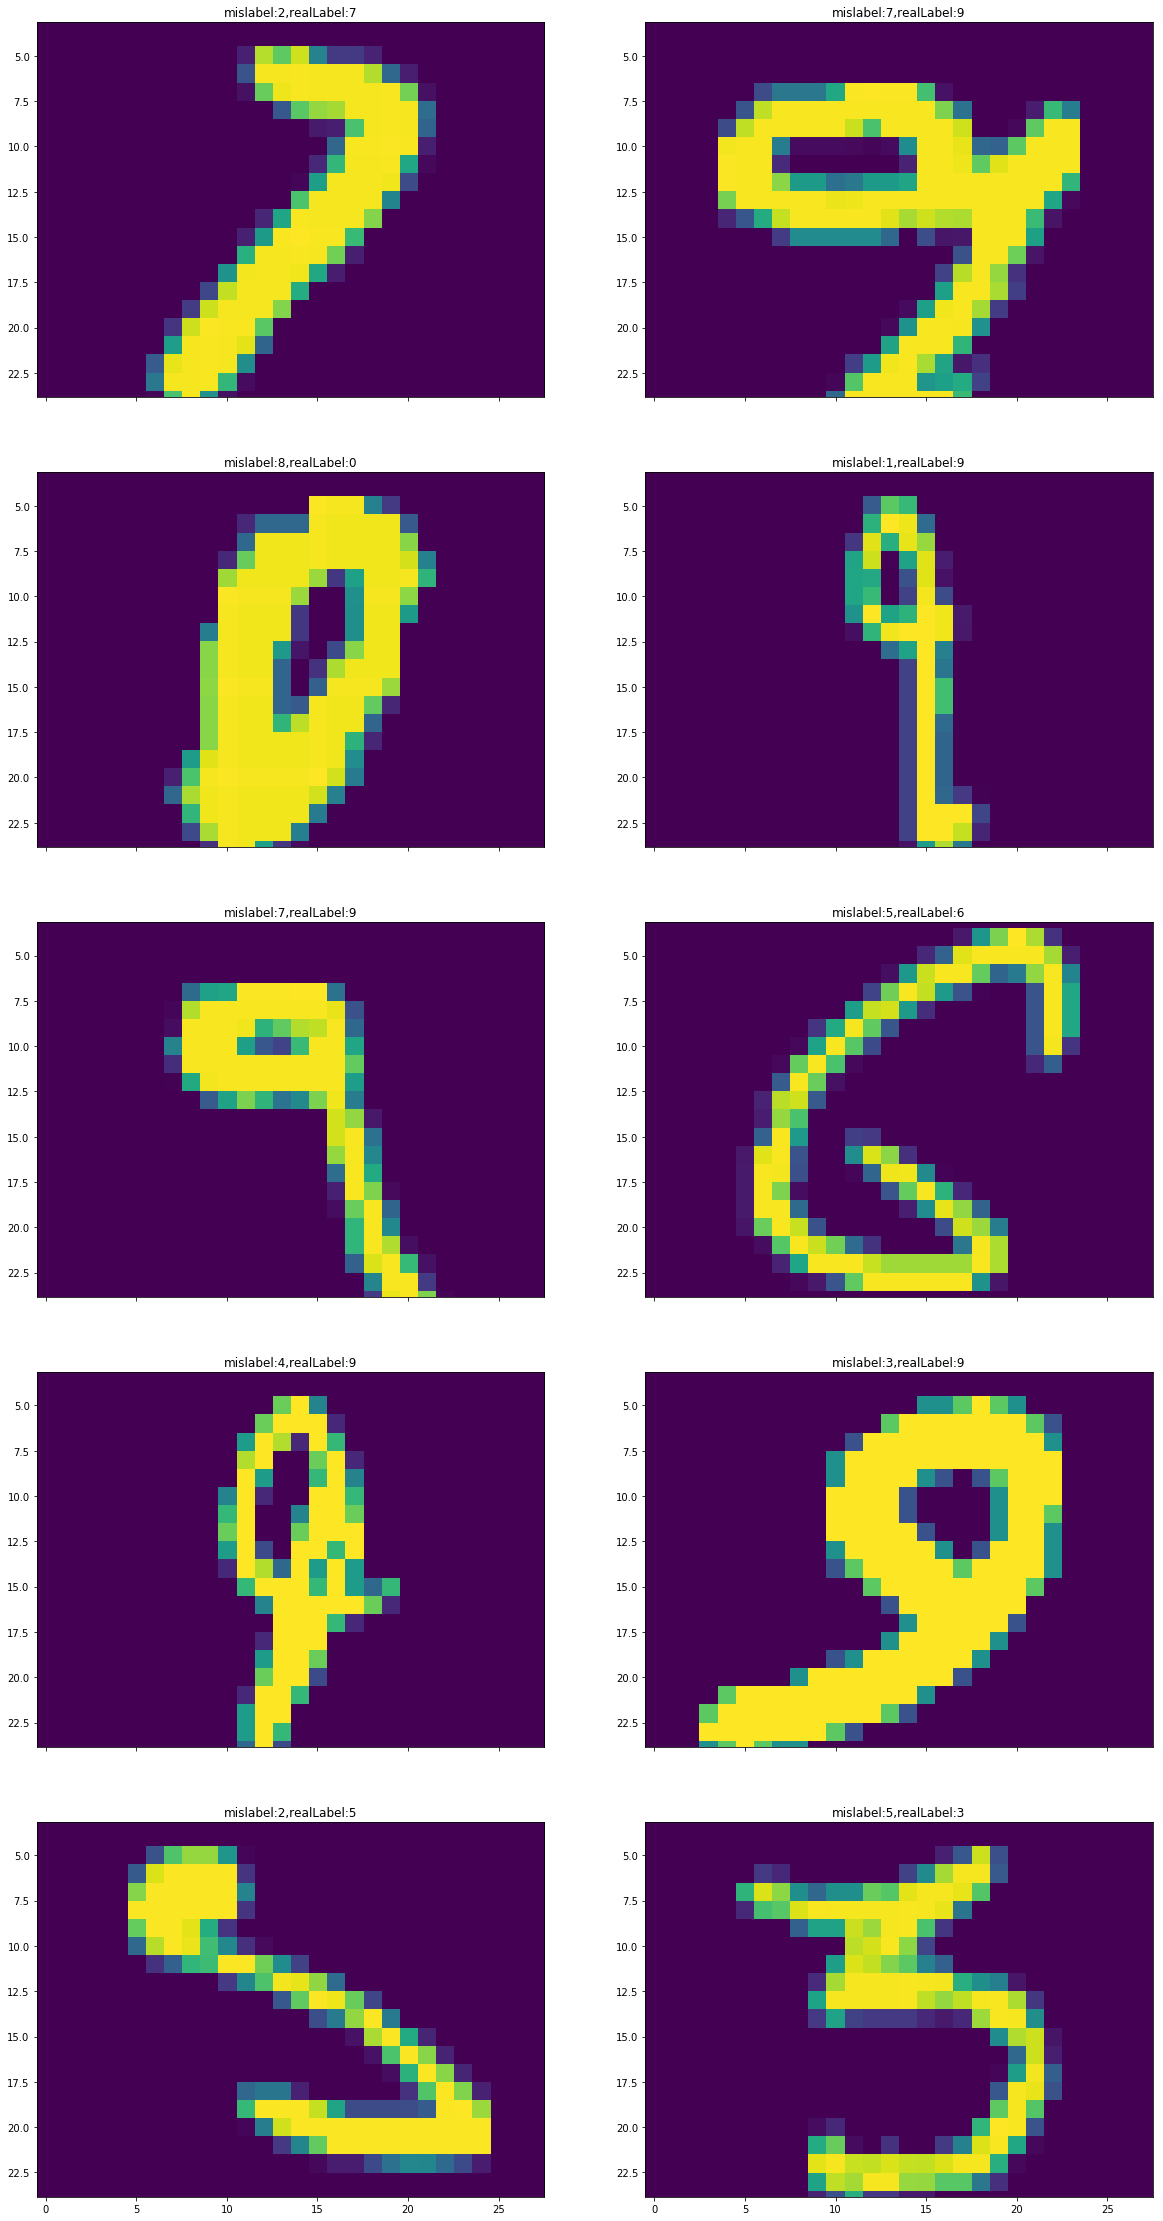

In [24]:
#random choose 10 from mismatches to display
choices = np.random.choice(range(len(mismatch)),size=10, replace=False)
fig, axs = plt.subplots(5,2,sharex=True,figsize=(20,40))
for i in range(len(choices)):
    index = choices[i]
    ax = axs[i//2][i%2]
    img = mismatch[index][1]
    mislabel = mismatch[index][0]
    realLabel = mismatch[index][2]
    ax.imshow(img[:,:,0])
    ax.set_title('mislabel:'+str(mislabel)+','+'realLabel:'+str(realLabel))
plt.show()